# Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/chekirou/International-conflict-prediction/master/data/actual.csv'

In [2]:
df = pd.read_csv(url)

In [3]:
csv1 = pd.read_csv('csv1.csv')
csv2 = pd.read_csv('csv2.csv')
csv3 = pd.read_csv('csv3.csv')
csv4 = pd.read_csv('csv4.csv')
csv5 = pd.read_csv('csv5.csv')
csv6 = pd.read_csv('csv6.csv')
csv_pov = pd.read_csv('poverty_df.csv')

In [4]:
csv1['CountryYear'] = csv1['Country']+csv1['Year'].astype(str)
csv2['CountryYear'] = csv2['Country']+csv2['Year'].astype(str)
csv3['CountryYear'] = csv3['Country']+csv3['Year'].astype(str)
csv4['CountryYear'] = csv4['Country']+csv4['Year'].astype(str)
csv5['CountryYear'] = csv5['Country']+csv5['Year'].astype(str)
csv6['CountryYear'] = csv6['Country']+csv6['Year'].astype(str)


In [5]:
csv_12 = pd.merge(csv1,csv2,on='CountryYear',how='outer')
csv_123 = pd.merge(csv_12,csv3,on='CountryYear',how='outer')
csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
csv_12345 = pd.merge(csv_1234,csv5,on='CountryYear',how='outer')
csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')



/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_42674/2404285424.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Year_x', 'ContinentCode_x', 'Code_x', 'Country_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_42674/2404285424.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Year_x', 'ContinentCode_x', 'Code_x', 'Country_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')


In [6]:
csv_full.isna().sum()

Country_x                                                   3796
Code_x                                                      3796
ContinentCode_x                                             4716
Year_x                                                      3796
Military spending percent of total government spending      8431
                                                            ... 
State legitimacy index 0 (high) - 10 (low)                  9751
Human rights and rule of law index 0 (high) - 10 (low)      9750
Demographic pressures 0 (low) - 10 (high)                   9750
Refugees and displaced persons index 0 (low) - 10 (high)    9750
External interventions index 0 (low) - 10 (high)            9750
Length: 114, dtype: int64

In [7]:
conflicts = pd.read_csv('./conflict_data/conflict_data_1970.csv')

In [8]:
def get_year(row):
    
    year_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [9]:
def get_country(row):
    
    country_name = row['CountryYear'][:-4]

    return country_name

In [10]:
def get_code(row):
    
    code_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [11]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)

In [12]:
csv_full['country_all'] = csv_full.apply(lambda x: get_country(x), axis=1)

In [13]:
csv_full['conflict_id'] =0
conflicts

csv_full[(csv_full['country_all']=='USA') & (csv_full['year_all']>1994)]

conflicts_1990 = conflicts[conflicts['Year']>1989]

In [14]:
my_list = []

def get_hist_data(country,year,lookback):
    
    early_year = lookback
    hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    while hist_data.shape[0] < lookback:
        early_year += 1
        hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    return hist_data

for index, row in conflicts_1990.iterrows():

    my_list.append(get_hist_data(row['Country'],row['Year'],5))


get_hist_data('USA',2010,10)    
    
len(my_list)
    

94

In [15]:
for i in range(len(my_list)):
    my_list[i]['conflict_id'] = i

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_42674/729059741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_list[i]['conflict_id'] = i


In [16]:
for i in range(len(my_list)):
    if len(my_list[i]) < 5:
        print(i)

In [17]:
final_df = pd.DataFrame(columns=my_list[50].columns)

In [18]:
final_df

,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,Healthcare price index world average = 100,...,Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,country_all,conflict_id


In [19]:
for i in range(len(my_list)):
    
    final_df = pd.concat([final_df,my_list[i]])

In [20]:
final_df.shape

(470, 117)

In [21]:
final_df

,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,Healthcare price index world average = 100,...,Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,country_all,conflict_id
6643,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,Rwanda,0
6644,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,Rwanda,0
6645,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,Rwanda,0
10638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,Rwanda,0
10639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,Rwanda,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,Kazakhstan,KAZ,AS,2017.0,3.45,214.0,55.08,70.57,63.413,30.55,...,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,Kazakhstan,93
4164,Kazakhstan,KAZ,AS,2018.0,4.65,310.0,NaN,NaN,NaN,NaN,...,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,Kazakhstan,93
4165,Kazakhstan,KAZ,AS,2019.0,5.25,312.0,NaN,NaN,NaN,NaN,...,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,Kazakhstan,93
4166,Kazakhstan,KAZ,AS,2020.0,4.56,268.0,NaN,NaN,NaN,NaN,...,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,Kazakhstan,93


# Dropping features

In [22]:
final_df.shape

(470, 117)

In [23]:
to_drop  = pd.DataFrame(final_df.isna().sum()/470)
len(to_drop)

117

In [24]:
to_drop_list = to_drop[to_drop[0]>0.7].index.values.tolist()
len(to_drop_list)

26

In [25]:
for i in to_drop_list:
    final_df.drop(columns=i, axis=1, inplace=True)

In [26]:
final_df['CountryYear']

6643         Rwanda1985
6644         Rwanda1986
6645         Rwanda1988
10638        Rwanda1987
10639        Rwanda1989
              ...      
4163     Kazakhstan2017
4164     Kazakhstan2018
4165     Kazakhstan2019
4166     Kazakhstan2020
4167     Kazakhstan2021
Name: CountryYear, Length: 470, dtype: object

# Dropping data for the imputer

In [27]:
bin_list = ['Country_x','Code_x','Country_y','Year_x','Year_y','Code_y','ContinentCode_y','ContinentCode_x','Christians as percent of the total population']
final_df.head()

,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Country_y,Code_y,...,Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,country_all,conflict_id
6643,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,Rwanda1985,Rwanda,RWA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,Rwanda,0
6644,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,Rwanda1986,Rwanda,RWA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,Rwanda,0
6645,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,Rwanda1988,Rwanda,RWA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,Rwanda,0
10638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1987,Rwanda,RWA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,Rwanda,0
10639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1989,Rwanda,RWA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,Rwanda,0


In [28]:
cleaner_df = final_df.drop(columns=bin_list)

In [29]:
cleaner_df['conflict_id']=cleaner_df['conflict_id'].astype(int)

In [30]:
cleaner_df

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,...,Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,country_all,conflict_id
6643,NaN,3.0,NaN,Rwanda1985,4.40,279.10,NaN,17.31,1.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,Rwanda,0
6644,NaN,2.0,NaN,Rwanda1986,5.47,301.80,NaN,15.87,-1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,Rwanda,0
6645,NaN,2.0,NaN,Rwanda1988,4.50,337.96,NaN,14.49,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,Rwanda,0
10638,NaN,NaN,NaN,Rwanda1987,-0.02,318.21,NaN,15.66,4.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,Rwanda,0
10639,NaN,NaN,NaN,Rwanda1989,-0.04,330.50,NaN,13.43,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,Rwanda,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,3.45,214.0,0.813,Kazakhstan2017,4.10,9247.58,24862.97,26.35,7.4,4.90,...,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,Kazakhstan,93
4164,4.65,310.0,0.817,Kazakhstan2018,4.10,9812.63,25544.35,25.26,6.0,4.85,...,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,Kazakhstan,93
4165,5.25,312.0,0.817,Kazakhstan2019,4.50,9812.60,26351.80,27.63,5.2,4.80,...,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,Kazakhstan,93
4166,4.56,268.0,0.825,Kazakhstan2020,-2.50,9121.64,25361.51,28.52,6.7,4.89,...,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,Kazakhstan,93


# Grouping the data


In [31]:
grouped_df = cleaner_df.groupby(by='conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_42674/2490057627.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = cleaner_df.groupby(by='conflict_id').mean()


In [32]:
grouped_df.columns

Index(['Military spending percent of total government spending ',
       'Arms imports million constant U.S. dollars',
       'Human Development Index (0 - 1)',
       'Economic growth: the rate of change of real GDP',
       'GDP per capita current U.S. dollars',
       'GDP per capita Purchasing Power Parity',
       'Capital investment as percent of GDP',
       'Inflation: percent change in the Consumer Price Index',
       'Unemployment rate', 'Youth unemployment ages 15-24',
       'Labor force participation rate',
       'Trade openness: exports plus imports as percent of GDP',
       'Foreign Direct Investment percent of GDP',
       'Trade balance as percent of GDP',
       'External debt percent of Gross National Income',
       'Government spending as percent of GDP',
       'Fiscal balance percent of GDP', 'Government debt as percent of GDP',
       'Foreign aid and official development assistance received',
       'Rule of law index (-2.5 weak; 2.5 strong)',
       'Govern

# Create the control dataset

In [86]:
conflict_years = final_df['CountryYear']

In [93]:
csv4_after_1980 = csv_full[csv_full['year_all'] > 1985]
csv4_after_1980_noconflict = csv4_after_1980[csv4_after_1980.CountryYear.isin(conflict_years)==False]
csv4_after_1980.shape[0] - csv4_after_1980_noconflict.shape[0]

437

In [94]:
def slice_fn(sample):
    year = int(sample[-4:])
    words = [sample[:-4]+str(year-i-1) for i in range(4)]
    words.append(sample)
    return words

In [96]:
from itertools import chain

sample_list = []

control_sample = csv4_after_1980.sample(270)

for index,row in control_sample.iterrows():
    sample_list.append(get_hist_data(row['country_all'],row['year_all'],5))

sample_full = sample_list[0]

for i in range(1,len(sample_list)):
    
    sample_full = pd.concat([sample_full,sample_list[i]])

    

In [97]:
id_list = list(range(95,365))*5

In [98]:
id_list = sorted(id_list)

In [99]:
sample_full['conflict_id'] = id_list
sample_full['country_all'].unique()

array(['Somalia', 'Uganda', 'Malaysia', 'Denmark', 'Bangladesh',
       'Honduras', 'Benin', 'Montserrat', 'Bhutan', 'Mexico', 'Czechia',
       'Croatia', 'Taiwan', 'Sierra Leone', 'Colombia', 'Andorra',
       'Rwanda', 'Fiji', 'Netherlands', 'Kyrgyzstan', 'Burkina Faso',
       'Tajikistan', 'Turkmenistan', 'Georgia',
       'Democratic Republic of the Congo', 'Moldova', 'Syria',
       'Montenegro', 'China', 'Kenya', 'Lebanon', 'Hungary', 'Armenia',
       'Swaziland', 'Equatorial Guinea', 'Comoros', 'Israel', 'Malawi',
       'Tanzania', 'Tunisia', 'Tuvalu', 'Guinea', 'Sweden', 'Brunei',
       'Kiribati', 'Austria', 'Philippines', 'Belize', 'Uzbekistan',
       'Mauritius', 'Faroe Islands', 'Ireland', 'Panama', 'South Korea',
       'Laos', 'Liberia', 'Bulgaria', 'USA', 'Barbados', 'Kazakhstan',
       'Vanuatu', 'Serbia', 'Japan', 'Madagascar', 'Iran', 'Suriname',
       'Cambodia', 'Australia', 'New Zealand', 'Bermuda', 'Mali',
       'Cyprus', 'Lesotho', 'Sudan', 'Gabon', 'Mor

In [100]:
control_groupedby = sample_full.groupby('conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_42674/3478027142.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_groupedby = sample_full.groupby('conflict_id').mean()


In [101]:
columns_to_keep = list(grouped_df.columns)

In [102]:
sample_full_clean = control_groupedby.drop(columns=[col for col in control_groupedby if col not in columns_to_keep])

sample_full_clean.isna().sum()

sample_full_clean

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
conflict_id,,,,,,,,,,,,,,,,,,,,,
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.2000,33.162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,15.5,NaN,3.134,324.138000,NaN,9.766,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,6.700,669.8,0.7580,4.524,7652.050000,19676.476000,21.760,2.64,3.3820,11.046,...,6.15,5.85,6.05,4.65,6.85,5.95,6.575,6.35,4.825,5.65
98,NaN,193.6,NaN,3.870,12935.886000,NaN,20.622,6.34,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,11.056,96.8,0.4032,4.630,298.632000,1871.876000,17.404,4.88,2.3175,5.790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,8.190,88.2,0.8328,3.032,14585.064000,24035.110000,26.152,3.52,6.5560,16.462,...,2.90,1.68,3.80,3.90,5.38,3.46,3.400,4.92,2.400,2.94
361,NaN,NaN,0.4260,0.810,319.332000,1719.600000,15.682,1.96,3.9780,7.204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,10.130,6.0,0.4875,5.630,318.446000,1367.280000,NaN,13.46,36.1200,47.820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
# sample_full_clean

# sara_conflict = pd.read_csv('imputed_final_df.csv',index_col=0)
# sara_control = pd.read_csv('imputed_control.csv')


# test_sara_conflict_ali_control = pd.concat([sara_conflict,imputed_control_df])
# test_sara_control_ali_conflict = pd.concat([imputed_conflict_df,sara_control])

# Merging dataset and imputing all


In [104]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)
imputer2 = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)

grouped_df['target'] = 1
sample_full_clean['target'] = 0

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


full_dataset = pd.concat([grouped_df,sample_full_clean])



In [105]:
data_numeric = full_dataset.select_dtypes(include=numerics)

imputer.fit(data_numeric)
imputed_final_df = pd.DataFrame(imputer.transform(data_numeric),columns=full_dataset.columns)
imputed_final_df.head()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
0,11.022810,2.333333,0.310879,2.862,313.514,-2946.911335,15.352,1.760000,9.494638,13.466476,...,8.362155,7.534308,9.713386,9.026137,8.584133,8.219773,9.887509,8.043133,9.642197,1.0
1,8.454911,16.000000,0.367812,3.200,823.864,-940.400692,13.258,2.740000,8.672927,15.433306,...,7.775074,7.446773,9.102548,8.674804,7.031400,6.181477,9.247226,7.829547,9.094863,1.0
2,10.390000,122.200000,0.307886,3.308,257.922,-4795.040659,15.868,7.766667,7.717502,12.663662,...,8.590521,8.243813,9.724656,9.218760,7.811634,7.409300,10.054381,8.952847,9.883836,1.0
3,9.311509,2.000000,0.310354,4.888,174.638,-5485.737086,21.562,11.140000,8.272512,12.451821,...,8.123308,7.646465,9.815473,8.844696,7.742780,6.987679,9.501362,7.880250,9.494491,1.0
4,9.304557,97.303528,0.631546,-4.666,1614.640,11135.460000,29.614,82.619474,7.048020,14.567017,...,5.671670,5.431247,6.210332,7.385429,6.871955,6.258850,7.006003,5.022173,6.723778,1.0


In [46]:
# data_numeric2 = grouped_df.select_dtypes(include=numerics)

# imputed_conflict_df = pd.DataFrame(imputer2.fit_transform(data_numeric2),columns=data_numeric2.columns)
# imputed_control_df = pd.DataFrame(imputer2.fit_transform(sample_full_clean),columns=data_numeric2.columns)

/Users/Ali/.pyenv/versions/3.10.6/envs/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [47]:
# imputed_control_df

In [106]:
separate_impute_full_df = pd.concat([imputed_control_df,imputed_conflict_df])
separate_impute_full_df['target'] = separate_impute_full_df['target'].astype(int)
separate_impute_full_df
imputed_final_df

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
0,11.022810,2.333333,0.310879,2.862,313.514000,-2946.911335,15.352000,1.760000,9.494638,13.466476,...,8.362155,7.534308,9.713386,9.026137,8.584133,8.219773,9.887509,8.043133,9.642197,1.0
1,8.454911,16.000000,0.367812,3.200,823.864000,-940.400692,13.258000,2.740000,8.672927,15.433306,...,7.775074,7.446773,9.102548,8.674804,7.031400,6.181477,9.247226,7.829547,9.094863,1.0
2,10.390000,122.200000,0.307886,3.308,257.922000,-4795.040659,15.868000,7.766667,7.717502,12.663662,...,8.590521,8.243813,9.724656,9.218760,7.811634,7.409300,10.054381,8.952847,9.883836,1.0
3,9.311509,2.000000,0.310354,4.888,174.638000,-5485.737086,21.562000,11.140000,8.272512,12.451821,...,8.123308,7.646465,9.815473,8.844696,7.742780,6.987679,9.501362,7.880250,9.494491,1.0
4,9.304557,97.303528,0.631546,-4.666,1614.640000,11135.460000,29.614000,82.619474,7.048020,14.567017,...,5.671670,5.431247,6.210332,7.385429,6.871955,6.258850,7.006003,5.022173,6.723778,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,8.190000,88.200000,0.832800,3.032,14585.064000,24035.110000,26.152000,3.520000,6.556000,16.462000,...,1.680000,3.800000,3.900000,5.380000,3.460000,3.400000,4.920000,2.400000,2.940000,0.0
360,10.110694,-6.949607,0.426000,0.810,319.332000,1719.600000,15.682000,1.960000,3.978000,7.204000,...,8.886464,8.002068,9.310071,8.340478,8.725250,7.730140,8.969141,7.404833,9.535016,0.0
361,10.130000,6.000000,0.487500,5.630,318.446000,1367.280000,24.114618,13.460000,36.120000,47.820000,...,5.863847,5.194049,8.160334,7.517593,6.792259,6.461245,8.396800,5.741718,7.782069,0.0
362,15.096690,208.367736,0.685000,-8.150,1559.373333,12229.363333,31.510000,277.222612,0.950000,1.845000,...,5.963096,3.505013,6.285873,7.230423,8.236399,8.085678,7.410177,4.034611,7.315290,0.0


In [49]:
# scaler2 = MinMaxScaler()
# separate_scaled = pd.DataFrame(scaler2.fit_transform(separate_impute_full_df), columns=separate_impute_full_df.columns)

# X2 = separate_scaled.drop(columns=['target'])
# y2 = separate_scaled['target']
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size = 0.3, random_state=5)



In [50]:
# bst2 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# bst2.fit(X_train2, y_train2)

In [51]:
# preds2 = bst2.predict(X_test2)

# accuracy_score(preds2,y_test2)

In [107]:
# print(imputed_final_df.shape)
# imputed_final_df.columns

imputed_final_df.describe()

,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),target
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,9.144366,201.010159,0.617606,3.519214,7765.762044,14409.512777,24.091745,96.182298,8.170407,16.563017,...,6.313280,5.717015,6.369058,6.841726,6.771532,6.459646,6.720072,5.250802,6.673497,0.258242
std,5.611811,387.788515,0.174779,3.217523,12028.292199,16164.134743,7.460230,572.558403,5.647768,11.066871,...,3.757713,5.737461,2.208580,1.940575,2.384796,2.287478,2.539209,3.998376,2.358672,0.438270
min,0.000000,-144.197539,0.167762,-11.480000,138.586000,-7414.818628,0.000000,-861.761734,0.380000,0.545000,...,-29.367166,-56.348428,-4.910661,-7.774708,-7.874445,-6.877977,-12.276979,-33.363698,-2.035144,0.000000
25%,5.139750,10.150000,0.474150,1.778500,810.061500,3071.083500,19.840608,2.542500,4.169500,8.413500,...,5.289011,5.095152,5.140794,6.139557,5.834625,5.396705,5.695000,4.000000,5.326427,0.000000
50%,8.757657,71.200000,0.640100,3.450911,2949.189000,8860.789584,23.515000,5.920000,7.579159,15.823674,...,6.988561,6.186378,6.508349,7.219435,7.150727,6.840000,7.022650,5.449020,6.909249,0.000000
75%,12.008500,206.621967,0.758050,5.130500,9266.704089,19430.515000,28.161000,14.995000,10.140380,21.088642,...,8.246973,7.780000,8.090308,8.078244,8.364301,7.946333,8.523333,7.476390,8.324378,1.000000
max,39.482000,3925.800000,0.952000,20.324000,75660.080000,89141.308000,54.414000,6517.100000,36.120000,78.004000,...,13.845717,14.954042,11.147420,10.262569,12.813838,12.219182,12.602004,12.360515,12.120484,1.000000


# Scaler on whole dataset

In [108]:
from sklearn.preprocessing import MinMaxScaler

In [109]:
scaler = MinMaxScaler()
full_dataset_scaled = pd.DataFrame(scaler.fit_transform(imputed_final_df), columns=imputed_final_df.columns)



# LET'S MODEL

In [110]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


X = full_dataset_scaled.drop(columns=['target'])
y = full_dataset_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)

In [111]:
y_train.value_counts()

0.0    191
1.0     63
Name: target, dtype: int64

In [118]:
bst = XGBClassifier(n_estimators=100,max_depth=30,learning_rate=1, 
                    objective='binary:logistic')

In [119]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=30, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [120]:
preds = bst.predict(X_test)

accuracy_score(preds,y_test)
bst.predict_proba(X_test)
accuracy_score(preds,y_test)


0.6636363636363637

In [121]:
import pandas as pd

features = bst.get_booster().feature_names
importances = bst.feature_importances_
feature_importances_df = pd.DataFrame(zip(features, importances), columns=['feature', 'importance']).set_index('feature')
feature_importances_df.sort_values('importance', ascending=False).head(10)





,importance
feature,
Civil liberties index 7 (weak) - 1 (strong),0.148449
External interventions index 0 (low) - 10 (high),0.068990
Rule of law index (-2.5 weak; 2.5 strong),0.059072
Government spending as percent of GDP,0.047661
Foreign Direct Investment percent of GDP,0.047010
Control of corruption (-2.5 weak; 2.5 strong),0.042909
Refugee population,0.039871
Political stability index (-2.5 weak; 2.5 strong),0.029803
Corruption Perceptions Index 100 = no corruption,0.028450


In [122]:
def get_imputed_df(country,year,lookback=5):
    df = get_hist_data(country,year,lookback).groupby('country_all').mean(numeric_only=True)
    df.drop(columns=[col for col in df if col not in columns_to_keep],inplace=True)
    df['target'] = 0.5
    imputed_df = pd.DataFrame(imputer.transform(df),columns=df.columns)
    imputed_df.drop(columns='target',inplace=True)
    
    
    return imputed_df




def get_prob(country,year,lookback=5):
    
    prob = bst.predict_proba(get_imputed_df(country,year,lookback))[0][1]
    return prob

def prob_series(country,start_year,end_year,lookback=5):
    my_list =[]
    for year in range(start_year,end_year+1):
        my_list.append(get_prob(country,year,lookback))
    return my_list

# NEXT STEPS:
#     - FINE TUNE MODEL PARAMS WITH GRID SEARCH / FEATURE SET TO IMPROVE PERFORMANCE 
#     - DELETE FEATURES SO LESS IMPUTATION/SOME ACTUAL TIME PROGRESS
#     - MORE STREAMLIT/START PUTTING PRESENTATION TOGETHER
#     - TRY GET GRAPH WORKING
#     - LOOK AT OTHER METRICS FOR MODEL - RECALL AND PRECISION
# AUTOML For hyperparams
# delete pre 1990 data
# add more non conflicts.. 1:3 or 1:4 - but be sure to look at recall and precision as well

    
prob_series('USA',1990,2020)
get_imputed_df('Iran',2019)


,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),Economic growth: the rate of change of real GDP,GDP per capita current U.S. dollars,GDP per capita Purchasing Power Parity,Capital investment as percent of GDP,Inflation: percent change in the Consumer Price Index,Unemployment rate,Youth unemployment ages 15-24,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
0,15.084,89.4,0.7944,2.578,5395.586,15294.85,32.274,12.46,11.778,27.074,...,7.74,9.52,8.94,6.54,5.9,9.0,9.36,5.14,6.54,6.7


<AxesSubplot: >

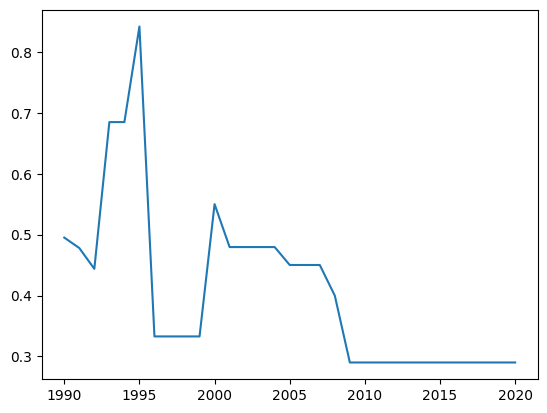

In [128]:



sns.lineplot(x = list(range(1990,2021)),y=prob_series('Somalia',1990,2020))




In [130]:
codes = pd.read_csv('country_code_example.csv')
codes.head()

code_dict = dict(codes['Country from our model']:codes['Code'])

SyntaxError: invalid syntax (954349558.py, line 4)

# Downloading the data